# Signal Processing Notebook: 03 
### Non- staionary signal with additive interaction between modes
### Non-linear signal with multiplicative interaction between modes (inter-mode non-linearity)

This Notebook explains the Spectral Analysis of artificial signal using Fourier spectrum, Spectrogram, Pwelch metchod and Hilbert Huang Transform. Artificial signals are composed of two sinusoids and an exponential decay with additive and multiplicative interactions between modes. 

$$ x_1 =  1.0 \times \sin({3 \cdot 2\pi t}) +  2.0 \times e^{-0.001 t} \times\sin({5 \cdot 2\pi t}) + Noise $$


$$ x_2 = 1.0 \times \sin({3 \cdot 2\pi t})   \times 2.0 \times\sin({5 \cdot 2\pi t})  + Noise $$

First signal is non-stationary but linear. Second signal is non-liear but stationary.

#### Contents of Notebook

1. Importing necessary libraries for signal processing, computing, plotting images
2. Signal Construction
3. Fourier Spectrum
4. Spectrogram
5. Pwelch Method
6. Hilbert huang Transform


#### Sources to learn Python, Numpy, SciPy, Pandas, Matplotlib:

* [Automate the Boring Stuff](https://automatetheboringstuff.com/)
* [Dive into Python3](https://diveintopython3.net/)
* [Python for Everyone](https://www.py4e.com/)
* [Numpy User guide](https://numpy.org/doc/stable/numpy-user.pdf)
* [Pandas User guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Pandas dataframe](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)
* [Scipy Lecture Notes](http://scipy-lectures.org/index.html)
* [Scipy Signal processing](https://docs.scipy.org/doc/scipy/reference/signal.html)
* [Matplotlib](http://scipy-lectures.org/intro/matplotlib/index.html)

Feel free to write me feedback at vishusharma296@gmail.com


**Author: Vishu Sharma** 

-Last Update: 26.09.2022\
-First Version: 26.03.2022\
-Version: 02_2022



In [1]:
# Importing Libraries

%matplotlib inline

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches


from scipy.fft import fft, ifft, rfft, rfftfreq
from scipy import signal
from scipy import ndimage

import emd

In [2]:
# Signal Properties

fs = 20                             # Sampling frequency
N = 2048                            # Number of data points
T = 1/fs                            # Sampling period
t = np.arange(N) / float(fs)        # Time vector

r=2*np.pi                           # For converting frequency in Hz to angular frequency in radians

In [3]:
# Checking dimensions of time vector and its values

print(t)
np.shape(t)

[0.0000e+00 5.0000e-02 1.0000e-01 ... 1.0225e+02 1.0230e+02 1.0235e+02]


(2048,)

#### Signal construction

In [4]:
# Signal components

A = 1.0*np.sin(3*r*t);
B = 2.0*np.sin(5*r*t);
E = np.exp(-0.001*t);                 # Exponential Decay

noise_power = 0.001 * fs / 2          # Noise power
rng = np.random.default_rng()         # random number generator
Noise = rng.normal(scale=np.sqrt(noise_power), size=t.shape);


### Signal with additive interaction between modes

$$ x_1 =  1.0 \times \sin({3 \cdot 2\pi t}) +  2.0 \times e^{-0.001 t} \times\sin({5 \cdot 2\pi t}) + Noise $$

Note here one component of is non-stationary due to the exponential decay. Overall signal is still linear due to additive interaction between modes.

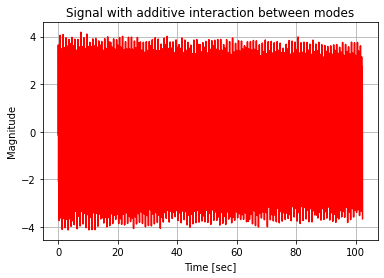

In [5]:
x1 = A + B*E   + Noise;

#Plotting

plt.figure(1)

#plt.subplot(211)
plt.plot(t,x1, 'r')
plt.title('Signal with additive interaction between modes')
plt.xlabel('Time [sec]')
plt.ylabel('Magnitude')
plt.grid()

#plt.subplot(211)
#plt.plot(Noise)

## Saving the image
resolution_value = 600
plt.savefig("TD01_Additive_interaction.jpeg", format = "jpeg", dpi = resolution_value)


#### Frequency spectrum for signal with additive interaction between modes using FFT 

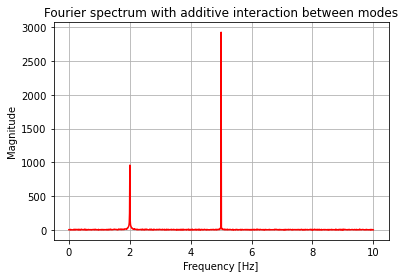

In [6]:
# Fourier Spectrum for signal with additive interaction between modes

Yf1 = rfft(x1)
Xf1 = rfftfreq(N, T)        # rfftfreq takes num of data points and sample spacing as input

# Plotting

plt.plot(Xf1, np.abs(Yf1), 'r')
plt.title('Fourier spectrum with additive interaction between modes')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
#plt.show()


## Saving the image
resolution_value = 600
plt.savefig("FD01_Additive_interaction.jpeg", format = "jpeg", dpi = resolution_value)

#### Spectrogram for signal with additive interaction between modes

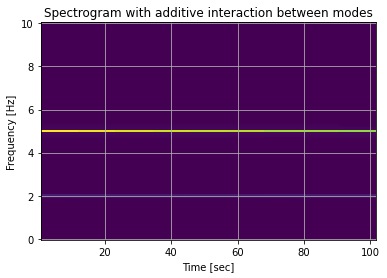

In [7]:
# Spectrogram for signal with additive interaction between modes

##signal.spectrogram takes time series x1 and sampling frequency as input

f, t, Sxx = signal.spectrogram(x1, fs)
plt.pcolormesh(t, f, Sxx, shading='auto')

plt.title('Spectrogram with additive interaction between modes')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.grid()
#plt.show()

## Saving the image
resolution_value = 600
plt.savefig("TFD01_Additive_interaction.jpeg", format = "jpeg", dpi = resolution_value)

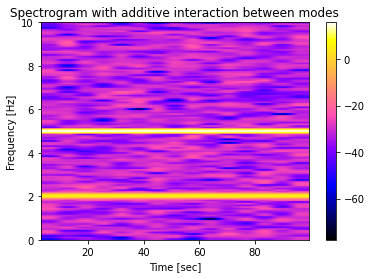

In [8]:
# Spectrogram with window for signal with additive interaction between modes
#In Specgram data is split into NFFT length segments and the spectrum of each section is computed.

plt.specgram(x1, Fs = fs, NFFT = 256, noverlap = 128, cmap= 'gnuplot2')

plt.title('Spectrogram with additive interaction between modes')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.colorbar()
#plt.show()


## Saving the image
resolution_value = 1200
plt.savefig("TFD02_Additive_interaction.jpeg", format = "jpeg", dpi = resolution_value)

### Signal with multiplicative interaction between modes

$$ x_2 = \sin{\frac{2\pi }{33} t} \times \sin{\frac{2\pi}{25} t} + Noise $$

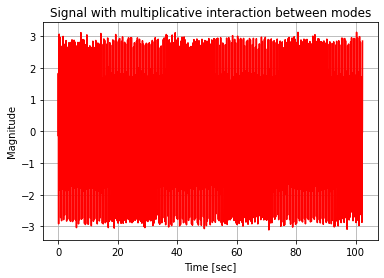

In [9]:
x2 = A * B + Noise;
t = np.arange(N) / float(fs)        # Time vector
plt.figure(2)


#plt.subplot(211)
plt.plot(t,x2, 'r')
plt.title('Signal with multiplicative interaction between modes')
plt.xlabel('Time [sec]')
plt.ylabel('Magnitude')

plt.grid()
#plt.subplot(211)
#plt.plot(Noise)


## Saving the image
resolution_value = 600
plt.savefig("TD01_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)


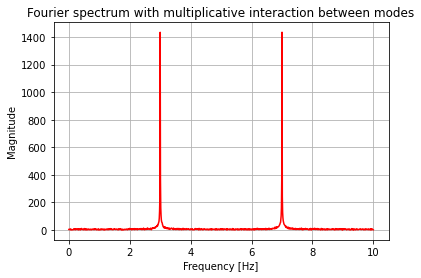

In [10]:
# Fourier Spectrum for signal with multiplicative interaction between modes

Yf2 = rfft(x2)
Xf2 = rfftfreq(N, T)        # rfftfreq takes num of data points and sample spacing as input

plt.plot(Xf2, np.abs(Yf2), 'r')
plt.title('Fourier spectrum with multiplicative interaction between modes')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
#plt.show()


## Saving the image
resolution_value = 600
plt.savefig("FD01_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)

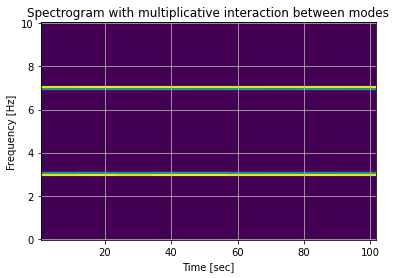

In [11]:
# Spectrogram for signal 2 with multiplicative interaction between modes

f, t, Sxx = signal.spectrogram(x2, fs)
plt.pcolormesh(t, f, Sxx, shading = 'auto')

plt.title('Spectrogram with multiplicative interaction between modes')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.grid()

#plt.show()

## Saving the image
resolution_value = 1200
plt.savefig("TFD01_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)


Signal contains two sinusoids with Frequency 30 mHZ and 40 mHZ. But due to multiplicative interaction between modes, Fourier spectrum shows 10mHz and 70mHz. Mathematical explanation of why we are seeing 10 mHz (40-30) and 70 mHz (30+40) in spectrum instead of expected 30mHz and 40mHz:


$$\sin{a}\sin{b}=  \frac{1}{2} [\cos{(a-b)} - \cos{(a+b)}]$$


Mathematically it makes perfect sense but physically it is meaningless. 10 mHz and 70 mHz does not exist in
signal and the spectrum obtained is misleading. Fourier Spectral analysis gives misleading frequency content in the case when modes interact multiplicatively.

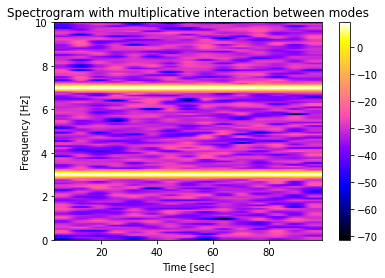

In [12]:
plt.specgram(x2, Fs = fs, NFFT = 256, noverlap = 128, cmap= 'gnuplot2')

plt.title('Spectrogram with multiplicative interaction between modes')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.colorbar()
#plt.show()


## Saving the image
resolution_value = 1200
plt.savefig("TFD02_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)


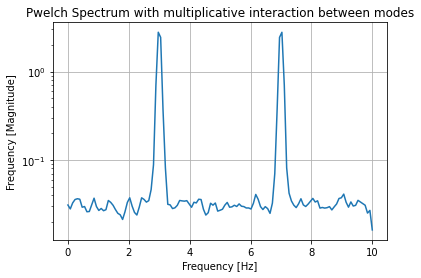

In [13]:
# Pwelch method
fx2, Pxx = signal.welch(x2, fs, window ='hann')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx))

plt.title('Pwelch Spectrum with multiplicative interaction between modes')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency [Magnitude]')

plt.grid()


## Saving the image
resolution_value = 1200
plt.savefig("PW01_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)



#### Hilbert Spectral Analysis using Hilbert Huang Transform

In [14]:
# Doing Empirical mode decomposition of signal

t = np.arange(N) / float(fs)                  # Time vector
#imf = emd.sift.sift(x)
imf_x1 = emd.sift.mask_sift(x1, max_imfs=5)   # Intrinsic mode functions
imf_x2 = emd.sift.mask_sift(x2, max_imfs=5)   # Intrinsic mode functions


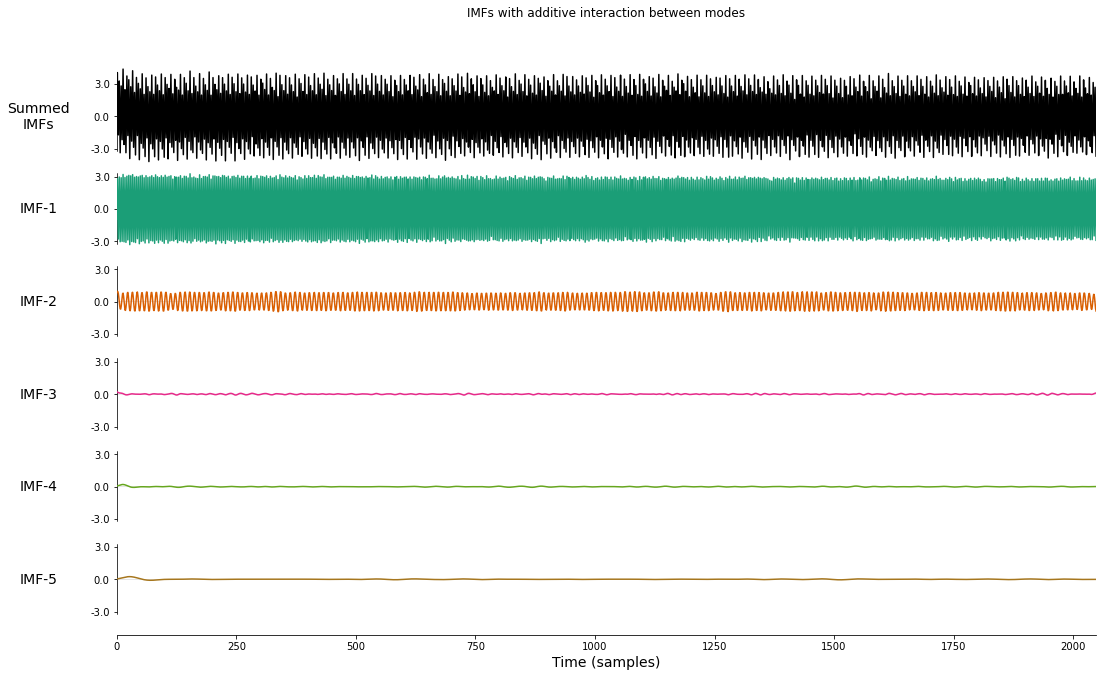

In [15]:
#Visualising Resulting IMFs
emd.plotting.plot_imfs(imf_x1)
plt.title('IMFs with additive interaction between modes')

## Saving the image
resolution_value = 1200
plt.savefig("IMFs01_Additive_interaction.jpeg", format = "jpeg", dpi = resolution_value)



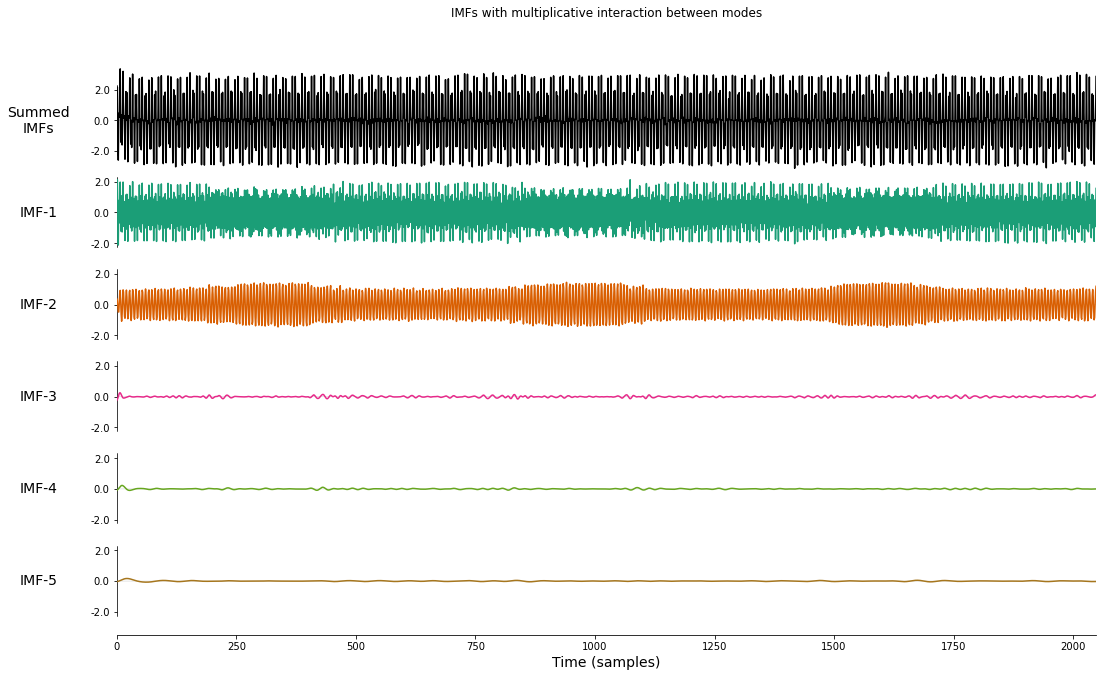

In [16]:
#Visualising Resulting IMFs
emd.plotting.plot_imfs(imf_x2)
plt.title('IMFs with multiplicative interaction between modes')

## Saving the image
resolution_value = 1200
plt.savefig("IMFs02_Multiplicative_interaction.jpeg", format = "jpeg", dpi = resolution_value)



In [17]:
#Computing instantaneous phase, instantaneous frequency and amplitude.
IP_x1, IF_x1, IA_x1 = emd.spectra.frequency_transform(imf_x1, fs, 'hilbert')
IP_x2, IF_x2, IA_x2 = emd.spectra.frequency_transform(imf_x2, fs, 'hilbert')

Text(0, 0.5, 'Frequency [Hz]')

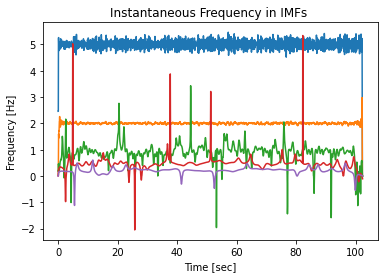

In [18]:
# Plotting instantaneous frequency for signal 1
plt.plot(t, IF_x1)
plt.title('Instantaneous Frequency in IMFs ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

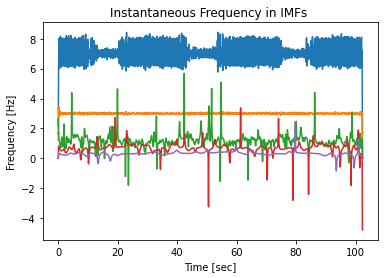

In [19]:
# Plotting instantaneous frequency for signal 2
plt.plot(t, IF_x2)
plt.title('Instantaneous Frequency in IMFs ')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Power')

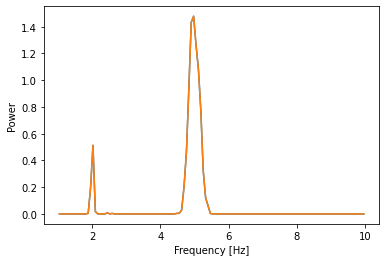

In [22]:
# Applying HHT to IMFs of x1

f_range = (1, 10, 128)
hht_x1, spec = emd.spectra.hilberthuang(IF_x1, IA_x1, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power') 


Text(0, 0.5, 'Power')

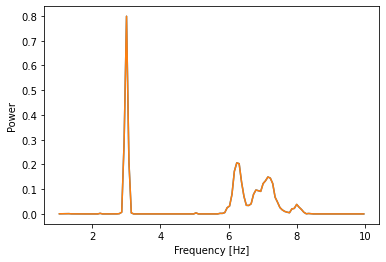

In [23]:
# Applying HHT to IMFs of x2

f_range = (1, 10, 128)
hht_x2, spec = emd.spectra.hilberthuang(IF_x2, IA_x2, f_range, scaling='density')
plt.plot(hht_x1, spec)
plt.plot(hht_x1, spec)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power dB/Hz') 